Falta:
- Acabar preproceso de las columnas
- Pasar a franjas la columna a predecir
- Borrar columnas con poca correlacion con la variable a predecir
- Borrar columnas con mucha correlacion entre ellas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [2]:
train_data = pd.read_csv('../datasets/original/train.csv', sep=',', na_values="NA")
test_data = pd.read_csv('../datasets/original/test.csv', sep=',', na_values="NA")
data = pd.concat([train_data, test_data],sort=False)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 81 entries, Id to SalePrice
dtypes: float64(12), int64(26), object(43)
memory usage: 1.8+ MB


In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Features preprocessing

In [8]:
data[data.columns[data.isna().any()]].isna().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

## MSSubClass

Identifies the type of dwelling involved in the sale.<br>
Type: Categorical

Check nulls

In [9]:
data['MSSubClass'].isna().sum()

0

In [10]:
data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

We change it to categorical

In [198]:
data.loc[data.MSSubClass == 20, 'MSSubClass'] = 'A'
data.loc[data.MSSubClass == 30, 'MSSubClass'] = 'B'
data.loc[data.MSSubClass == 40, 'MSSubClass'] = 'C'
data.loc[data.MSSubClass == 45, 'MSSubClass'] = 'D'
data.loc[data.MSSubClass == 50, 'MSSubClass'] = 'E'
data.loc[data.MSSubClass == 60, 'MSSubClass'] = 'F'
data.loc[data.MSSubClass == 70, 'MSSubClass'] = 'G'
data.loc[data.MSSubClass == 75, 'MSSubClass'] = 'H'
data.loc[data.MSSubClass == 80, 'MSSubClass'] = 'I'
data.loc[data.MSSubClass == 85, 'MSSubClass'] = 'J'
data.loc[data.MSSubClass == 90, 'MSSubClass'] = 'K'
data.loc[data.MSSubClass == 120, 'MSSubClass'] = 'L'
data.loc[data.MSSubClass == 150, 'MSSubClass'] = 'M'
data.loc[data.MSSubClass == 160, 'MSSubClass'] = 'N'
data.loc[data.MSSubClass == 180, 'MSSubClass'] = 'O'
data.loc[data.MSSubClass == 190, 'MSSubClass'] = 'P'

In [11]:
data['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

## MSZoning

Identifies the general zoning classification of the sale.<br>
Type: Categorical

Check nulls

In [200]:
data['MSZoning'].isna().sum()

4

There is a very low number of nulls so we substitue them by the median.

In [201]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [202]:
median = 'RL'
data.loc[data.MSZoning.isna(), 'MSZoning'] = median
data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

## LotFrontage

Linear feet of street connected to property. <br>
Type: Numeric

Check nulls

In [203]:
data['LotFrontage'].isna().sum()

486

There are too many nulls so we delete the column.

In [204]:
data.drop(columns=['LotFrontage'],inplace=True)

## LotArea

Lot size in square feet. <br>
Type: Numeric

Check nulls

In [205]:
data['LotArea'].isna().sum()

0

Check outliers

In [206]:
outliers = data[data.LotArea>data.LotArea.mean()+2*data.LotArea.std()]
len(outliers)

43

We delete them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cd6e39450>]],
      dtype=object)

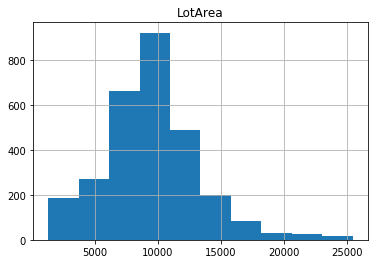

In [207]:
data = data[data['LotArea'] < data.LotArea.mean()+2*data.LotArea.std()]
data.hist(column=['LotArea'])

## Street

Type of road access to property. <br>
Type: Binary

Check nulls

In [208]:
data['Street'].isna().sum()

0

Check distribution

In [209]:
data['Street'].value_counts()

Pave    2866
Grvl      10
Name: Street, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future

## Alley

Type of alley access to property. <br>
Type: Binary

Check nulls

In [210]:
data['Alley'].isna().sum()

2678

There are too many nulls so we delete the column.

In [211]:
data.drop(columns=['Alley'],inplace=True)

## LotShape

General shape of property. <br>
Type: Categorical

Check nulls

In [212]:
data['LotShape'].isna().sum()

0

Check distribution

In [213]:
data['LotShape'].value_counts()

Reg    1852
IR1     944
IR2      67
IR3      13
Name: LotShape, dtype: int64

We merge the three types of irregular

In [214]:
data.loc[data.LotShape == 'IR1', 'LotShape'] = 'IR'
data.loc[data.LotShape == 'IR2', 'LotShape'] = 'IR'
data.loc[data.LotShape == 'IR3', 'LotShape'] = 'IR'
data['LotShape'].value_counts()

Reg    1852
IR     1024
Name: LotShape, dtype: int64

## LandContour

Flatness of the property. <br>
Type: Categorical

Check nulls

In [215]:
data['LandContour'].isna().sum()

0

Check distribution

In [216]:
data['LandContour'].value_counts()

Lvl    2604
HLS     117
Bnk     109
Low      46
Name: LandContour, dtype: int64

## Utilities

Type of utilities available. <br>
Type: Categorical

Check nulls

In [217]:
data['Utilities'].isna().sum()

1

Check distribution

In [218]:
data['Utilities'].value_counts()

AllPub    2874
NoSeWa       1
Name: Utilities, dtype: int64

This column gives not information at all, so we delete it

In [219]:
data.drop(columns=['Utilities'],inplace=True)

## LotConfig

Lot configuration. <br>
Type: Categorical

Check nulls

In [220]:
data['LotConfig'].isna().sum()

0

Check distribution

In [221]:
data['LotConfig'].value_counts()

Inside     2111
Corner      507
CulDSac     163
FR2          81
FR3          14
Name: LotConfig, dtype: int64

We merge the two types of frontage

In [222]:
data.loc[data.LotConfig == 'FR2', 'LotConfig'] = 'FR'
data.loc[data.LotConfig == 'FR3', 'LotConfig'] = 'FR'
data['LotConfig'].value_counts()

Inside     2111
Corner      507
CulDSac     163
FR           95
Name: LotConfig, dtype: int64

## LandSlope

Slope of property. <br>
Type: Categorical

Check nulls

In [223]:
data['LandSlope'].isna().sum()

0

Check distribution

In [224]:
data['LandSlope'].value_counts()

Gtl    2753
Mod     115
Sev       8
Name: LandSlope, dtype: int64

## Neighborhood

Physical locations within Ames city limits. <br>
Type: Categorical

Check nulls

In [225]:
data['Neighborhood'].isna().sum()

0

Check distribution

In [226]:
data['Neighborhood'].value_counts()

NAmes      440
CollgCr    267
OldTown    238
Edwards    190
Somerst    182
NridgHt    166
Gilbert    161
Sawyer     151
NWAmes     131
SawyerW    124
Mitchel    108
BrkSide    108
Crawfor    101
IDOTRR      92
NoRidge     68
Timber      66
StoneBr     49
SWISU       48
MeadowV     37
ClearCr     35
BrDale      30
Blmngtn     28
NPkVill     23
Veenker     23
Blueste     10
Name: Neighborhood, dtype: int64

## Condition1

Proximity to various conditions. <br>
Type: Categorical

Check nulls

In [227]:
data['Condition1'].isna().sum()

0

Check distribution

In [228]:
data['Condition1'].value_counts()

Norm      2478
Feedr      160
Artery      90
RRAn        49
PosN        37
RRAe        28
PosA        19
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

We merge the ones that are related

In [229]:
data.loc[data.Condition1 == 'RRNn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRAn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRNe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'RRAe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'PosN', 'Condition1'] = 'Pos'
data.loc[data.Condition1 == 'PosA', 'Condition1'] = 'Pos'
data['Condition1'].value_counts()

Norm      2478
Feedr      160
Artery      90
RRn         58
Pos         56
RRe         34
Name: Condition1, dtype: int64

## Condition2

Proximity to various conditions (if more than one is present). <br>
Type: Categorical

Check nulls

In [230]:
data['Condition2'].isna().sum()

0

Check distribution

In [231]:
data['Condition2'].value_counts()

Norm      2848
Feedr       12
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

We delete this column because it gives not enought information.

In [232]:
data.drop(columns=['Condition2'],inplace=True)

## BldgType

Type of dwelling. <br>
Type: Categorical

Check nulls

In [233]:
data['BldgType'].isna().sum()

0

Check distribution

In [234]:
data['BldgType'].value_counts()

1Fam      2386
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      58
Name: BldgType, dtype: int64

We merge the ones that are related

In [235]:
data.loc[data.BldgType == 'TwnhsE', 'BldgType'] = 'Twnhs'
data['BldgType'].value_counts()

1Fam      2386
Twnhs      323
Duplex     109
2fmCon      58
Name: BldgType, dtype: int64

## HouseStyle

Style of dwelling. <br>
Type: Categorical

Check nulls

In [236]:
data['HouseStyle'].isna().sum()

0

Check distribution

In [237]:
data['HouseStyle'].value_counts()

1Story    1443
2Story     862
1.5Fin     310
SLvl       128
SFoyer      83
2.5Unf      23
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

## OverallQual

Rates the overall material and finish of the house. <br>
Type: Numeric

Check nulls

In [238]:
data['OverallQual'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cd6d9b790>]],
      dtype=object)

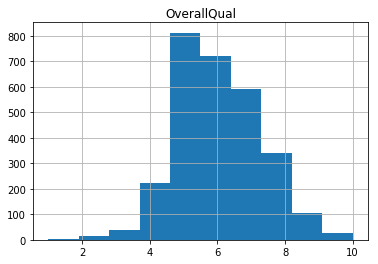

In [239]:
data.hist(column=['OverallQual'])

## OverallCond

Rates the overall condition of the house. <br>
Type: Numeric

Check nulls

In [240]:
data['OverallCond'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cd6ce2c10>]],
      dtype=object)

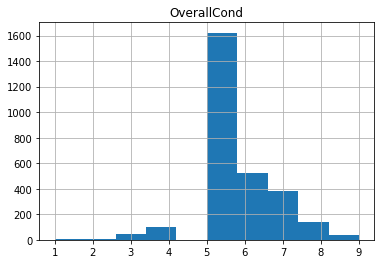

In [241]:
data.hist(column=['OverallCond'])

## YearBuilt

Original construction date. <br>
Type: Date

Check nulls

In [242]:
data['YearBuilt'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf81cd510>]],
      dtype=object)

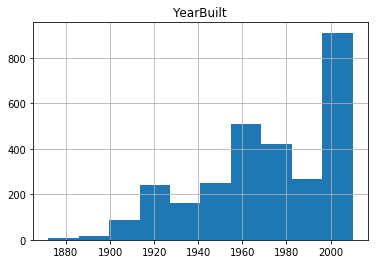

In [243]:
data.hist(column=['YearBuilt'])

## YearRemodAdd

Remodel date (same as construction date if no remodeling or additions). <br>
Type: Date

Check nulls

In [244]:
data['YearRemodAdd'].isna().sum()

0

Check differences with the previous column

In [246]:
len(data[(data['YearBuilt'] == data['YearRemodAdd'])])

1538

We create a new column that tells if the house has been remodeled.

In [248]:
data['Remod'] = data.apply(lambda row: row['YearBuilt'] != row['YearRemodAdd'], axis=1)
data['Remod'].value_counts()

False    1538
True     1338
Name: Remod, dtype: int64

## RoofStyle

Type of roof. <br>
Type: Categorical

Check nulls

In [17]:
data['RoofStyle'].isna().sum()

0

Check distribution

In [61]:
data['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

## Roof material

Roof material. <br>
Type: Categorical

Check nulls

In [20]:
data['RoofMatl'].isna().sum()

0

In [21]:
data['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future.

## Exterior1st

Exterior covering on house. <br>
Type: Categorical

In [22]:
data['Exterior1st'].isna().sum()

1

As there is only 1 NA, we will susbtitute this value with the mode.

In [23]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [24]:
mode = 'VinylSd'
data.loc[data.Exterior1st.isna(), 'Exterior1st'] = mode
data['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

## Exterior2nd

Exterior covering on house (if more than one material). <br>
Type: Categorical

In [26]:
data['Exterior2nd'].isna().sum()

1

As there is only 1 NA, we will susbtitute this value with the mode.

In [27]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [28]:
mode = 'VinylSd'
data.loc[data.Exterior2nd.isna(), 'Exterior2nd'] = mode
data['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

These two variables "Exterior1st" and "Exterior2nd" might be fused in the future because it looks like having 2 types of exterior covering is the common option.

## MasVnrType

Masonry veneer type (non-structural external layer of masonry). <br>
Type: Categorical

In [30]:
data['MasVnrType'].isna().sum()

24

In [33]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

## MasVnrArea

Masonry Masonry veneer area in square feet. <br>
Type: Numerical

In [35]:
data['MasVnrArea'].isna().sum()

23

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd575cee748>]],
      dtype=object)

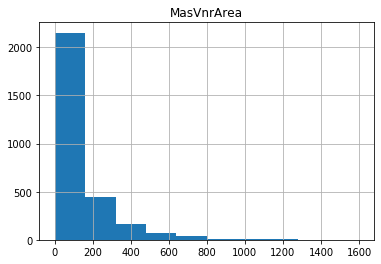

In [37]:
data.hist(column=['MasVnrArea'])

Boxplots


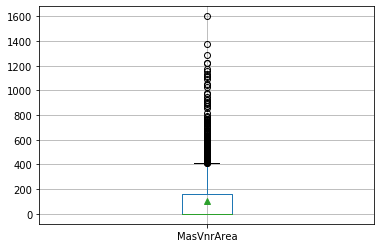

In [38]:
data.boxplot(column=['MasVnrArea'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

## ExterQual

Evaluates the quality of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [39]:
data['ExterQual'].isna().sum()

0

In [40]:
data['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

## ExterCond

Evaluates the present condition of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [41]:
data['ExterCond'].isna().sum()

0

In [42]:
data['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [43]:
len(data[(data['ExterCond'] == data['ExterQual'])])

1620

## Foundation

Masonry Masonry veneer area in square feet. <br>
<br>
       BrkTil->Brick & Tile<br>
       CBlock->Cinder Block<br>
       PConc->Poured Contrete	<br>
       Slab->Slab<br>
       Stone->Stone<br>
       Wood->Wood<br>
<br>
Type: Categorical

In [44]:
data['Foundation'].isna().sum()

0

In [45]:
data['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

## BsmtQual

Evaluates the height of the basement. <br>
<br>
       Ex->Excellent (100+ inches)<br>
       Gd->Good (90-99 inches)<br>
       TA->Typical (80-89 inches)<br>
       Fa->Fair (70-79 inches)<br>
       Po->Poor (<70 inches)<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [46]:
data['BsmtQual'].isna().sum()

81

In this case NA does not mean the value is missing, it means it makes no sense to evaluate it.

In [47]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

## BsmtCond

Evaluates the general condition of the basement.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical - slight dampness allowed<br>
       Fa->Fair - dampness or some cracking or settling<br>
       Po->Poor - Severe cracking, settling, or wetness<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [48]:
data['BsmtCond'].isna().sum()

82

In [ ]:
data['BsmtQual'].value_counts()

## BsmtExposure

Refers to walkout or garden level walls.<br>
<br>
       Gd->Good Exposure<br>
       Av->Average Exposure (split levels or foyers typically score average or above)<br>	
       Mn->Mimimum Exposure<br>
       No->No Exposure<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [49]:
data['BsmtExposure'].isna().sum()

82

In [50]:
data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

## BsmtFinType1

Rating of basement finished area.<br>
<br>
       GLQ->Good Living Quarters<br>
       ALQ->Average Living Quarters<br>
       BLQ->Below Average Living Quarters<br>	
       Rec->Average Rec Room<br>
       LwQ->Low Quality<br>
       Unf->Unfinshed<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [51]:
data['BsmtFinType1'].isna().sum()

79

In [52]:
data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

## BsmtFinSF1

Type 1 finished square feet.<br>
Type: Categorical

In [53]:
data['BsmtFinSF1'].isna().sum()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57578c4a8>]],
      dtype=object)

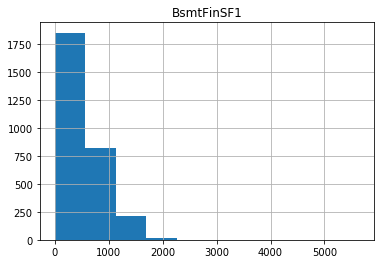

In [55]:
data.hist(column=['BsmtFinSF1'])

## BsmtFinType2

## BsmtFinSF2

## BsmtUnfSF

## TotalBsmtSF

Total square feet of basement area<br>
Type: Numerical

In [56]:
data['TotalBsmtSF'].isna().sum()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5756a1b38>]],
      dtype=object)

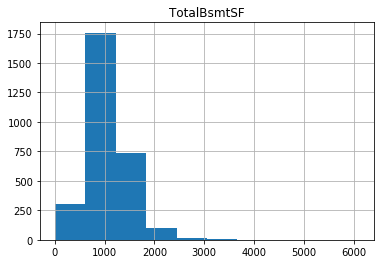

In [57]:
data.hist(column=['TotalBsmtSF'])

## Heating

Type of heating.<br>
<br>
       Floor->Floor Furnace<br>
       GasA->Gas forced warm air furnace<br>
       GasW->Gas hot water or steam heat<br>
       Grav->Gravity furnace<br>	
       OthW->Hot water or steam heat other than gas<br>
       Wall->Wall furnace<br>
<br>       
Type: Categorical

In [58]:
data['Heating'].isna().sum()

0

In [59]:
data['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

## HeatingQC

Heating quality and condition.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>       
Type: Categorical

In [62]:
data['HeatingQC'].isna().sum()

0

In [63]:
data['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

## CentralAir

Central air conditioning.<br>
<br>
       N->No
       Y->Yes
<br>
Type: Binary		

In [64]:
data['CentralAir'].isna().sum()

0

In [65]:
data['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

We change the values to boolean ones.

In [66]:
data.loc[data.CentralAir == 'Y', 'CentralAir'] = True
data.loc[data.CentralAir == 'N', 'CentralAir'] = False

In [67]:
data['CentralAir'].value_counts()

True     2723
False     196
Name: CentralAir, dtype: int64

## Electrical

Electrical system.<br>
<br>
       SBrkr->Standard Circuit Breakers & Romex<br>
       FuseA->Fuse Box over 60 AMP and all Romex wiring (Average)<br>	
       FuseF->60 AMP Fuse Box and mostly Romex wiring (Fair)<br>
       FuseP->60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>
       Mix->Mixed<br>
<br>       
Type: Categorical

In [68]:
data['Electrical'].isna().sum()

1

In [69]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

We fill the NA value with the mode.

In [70]:
mode = 'SBrkr'
data.loc[data.Electrical.isna(), 'Electrical'] = mode
data['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

## 1stFlrSF

First Floor square feet.<br>
Type: Numerical

In [71]:
data['1stFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd575771240>]],
      dtype=object)

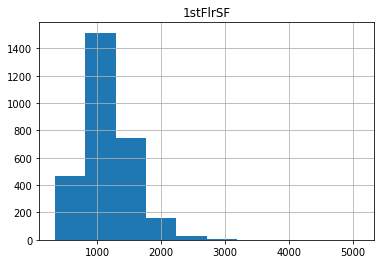

In [72]:
data.hist(column=['1stFlrSF'])

## 2ndFlrSF

Second floor square feet.<br>
Type: Numerical

In [74]:
data['2ndFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd575644160>]],
      dtype=object)

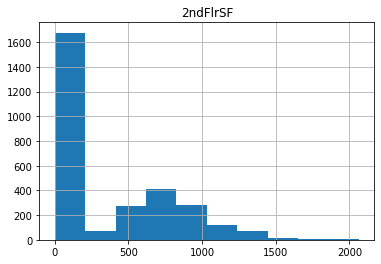

In [73]:
data.hist(column=['2ndFlrSF'])

## LowQualFinSF

Low quality finished square feet (all floors).<br>
Type: Numerical

In [75]:
data['LowQualFinSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57552f0b8>]],
      dtype=object)

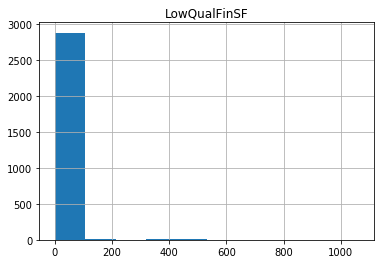

In [78]:
data.hist(column=['LowQualFinSF'])

Nearly all instances have the same value so not many information can be extracted, we will delete this column.

In [79]:
data.drop(columns=['LowQualFinSF'],inplace=True)